In [26]:
import pandas as pd
from sklearn import *
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("/data/kaggle/data_combined_cleaned.csv")
df = df.drop(columns="Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [4]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [12]:
target = "SalesPrice"
X = df.drop(columns=target)
X = pd.get_dummies(X)
features = X.columns
X = X.values.astype("float")
X = preprocessing.StandardScaler().fit_transform(X)
X

array([[ 0.07337496, -0.23082236, -0.20714171, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.4380509 , -0.09188637, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07337496, -0.09704771,  0.07347998, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 0.30985939, -0.18623081, -0.14781027, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276, -0.09704771, -0.08016039, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.21509315, -0.05811155, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [15]:
X.shape

(1460, 300)

In [16]:
pca = decomposition.PCA()
X_pca = pca.fit_transform(X)

In [17]:
X_pca.shape

(1460, 300)

In [19]:
np.var(X_pca, axis = 0)

array([1.93700684e+01, 8.85008547e+00, 7.47196314e+00, 6.98159334e+00,
       5.87663330e+00, 5.26325169e+00, 4.61716037e+00, 4.58784269e+00,
       3.77920328e+00, 3.54686553e+00, 3.52644133e+00, 3.41655009e+00,
       3.26736948e+00, 3.04805853e+00, 2.98845226e+00, 2.89366158e+00,
       2.82710103e+00, 2.76079961e+00, 2.67631589e+00, 2.66079138e+00,
       2.60061076e+00, 2.48271831e+00, 2.45366341e+00, 2.40637084e+00,
       2.37152318e+00, 2.33520769e+00, 2.28252288e+00, 2.26532428e+00,
       2.20797504e+00, 2.17306533e+00, 2.15246479e+00, 2.12311015e+00,
       2.09316505e+00, 2.06322901e+00, 2.04576745e+00, 2.00395476e+00,
       1.97114400e+00, 1.93253504e+00, 1.91183622e+00, 1.88484615e+00,
       1.87259069e+00, 1.85948284e+00, 1.85336834e+00, 1.82840435e+00,
       1.77123493e+00, 1.74879634e+00, 1.72863210e+00, 1.72095755e+00,
       1.68857778e+00, 1.64418199e+00, 1.63130910e+00, 1.61776284e+00,
       1.60426392e+00, 1.58492381e+00, 1.56948188e+00, 1.56819750e+00,
      

In [21]:
var_l1 = np.var(X_pca, axis = 0)/np.var(X_pca, axis = 0).sum()
var_l1

array([6.45668948e-02, 2.95002849e-02, 2.49065438e-02, 2.32719778e-02,
       1.95887777e-02, 1.75441723e-02, 1.53905346e-02, 1.52928090e-02,
       1.25973443e-02, 1.18228851e-02, 1.17548044e-02, 1.13885003e-02,
       1.08912316e-02, 1.01601951e-02, 9.96150753e-03, 9.64553860e-03,
       9.42367009e-03, 9.20266537e-03, 8.92105295e-03, 8.86930460e-03,
       8.66870254e-03, 8.27572771e-03, 8.17887804e-03, 8.02123612e-03,
       7.90507726e-03, 7.78402565e-03, 7.60840960e-03, 7.55108093e-03,
       7.35991680e-03, 7.24355109e-03, 7.17488265e-03, 7.07703384e-03,
       6.97721685e-03, 6.87743004e-03, 6.81922482e-03, 6.67984921e-03,
       6.57048002e-03, 6.44178347e-03, 6.37278740e-03, 6.28282050e-03,
       6.24196895e-03, 6.19827614e-03, 6.17789447e-03, 6.09468118e-03,
       5.90411642e-03, 5.82932113e-03, 5.76210699e-03, 5.73652516e-03,
       5.62859260e-03, 5.48060664e-03, 5.43769701e-03, 5.39254281e-03,
       5.34754641e-03, 5.28307937e-03, 5.23160627e-03, 5.22732499e-03,
      

In [23]:
pca.explained_variance_ratio_

array([6.45668948e-02, 2.95002849e-02, 2.49065438e-02, 2.32719778e-02,
       1.95887777e-02, 1.75441723e-02, 1.53905346e-02, 1.52928090e-02,
       1.25973443e-02, 1.18228851e-02, 1.17548044e-02, 1.13885003e-02,
       1.08912316e-02, 1.01601951e-02, 9.96150753e-03, 9.64553860e-03,
       9.42367009e-03, 9.20266537e-03, 8.92105295e-03, 8.86930460e-03,
       8.66870254e-03, 8.27572771e-03, 8.17887804e-03, 8.02123612e-03,
       7.90507726e-03, 7.78402565e-03, 7.60840960e-03, 7.55108093e-03,
       7.35991680e-03, 7.24355109e-03, 7.17488265e-03, 7.07703384e-03,
       6.97721685e-03, 6.87743004e-03, 6.81922482e-03, 6.67984921e-03,
       6.57048002e-03, 6.44178347e-03, 6.37278740e-03, 6.28282050e-03,
       6.24196895e-03, 6.19827614e-03, 6.17789447e-03, 6.09468118e-03,
       5.90411642e-03, 5.82932113e-03, 5.76210699e-03, 5.73652516e-03,
       5.62859260e-03, 5.48060664e-03, 5.43769701e-03, 5.39254281e-03,
       5.34754641e-03, 5.28307937e-03, 5.23160627e-03, 5.22732499e-03,
      

In [22]:
var_l1.sum()

1.0

In [14]:
pca.explained_variance_

array([1.93833447e+01, 8.85615133e+00, 7.47708444e+00, 6.98637853e+00,
       5.88066115e+00, 5.26685913e+00, 4.62032498e+00, 4.59098720e+00,
       3.78179355e+00, 3.54929656e+00, 3.52885836e+00, 3.41889179e+00,
       3.26960894e+00, 3.05014767e+00, 2.99050055e+00, 2.89564490e+00,
       2.82903872e+00, 2.76269187e+00, 2.67815024e+00, 2.66261509e+00,
       2.60239322e+00, 2.48441997e+00, 2.45534515e+00, 2.40802016e+00,
       2.37314862e+00, 2.33680825e+00, 2.28408732e+00, 2.26687693e+00,
       2.20948839e+00, 2.17455475e+00, 2.15394010e+00, 2.12456533e+00,
       2.09459971e+00, 2.06464315e+00, 2.04716962e+00, 2.00532828e+00,
       1.97249503e+00, 1.93385960e+00, 1.91314660e+00, 1.88613802e+00,
       1.87387416e+00, 1.86075733e+00, 1.85463864e+00, 1.82965754e+00,
       1.77244893e+00, 1.74999497e+00, 1.72981690e+00, 1.72213709e+00,
       1.68973513e+00, 1.64530892e+00, 1.63242720e+00, 1.61887166e+00,
       1.60536349e+00, 1.58601012e+00, 1.57055760e+00, 1.56927234e+00,
      

Text(0, 0.5, 'Explained variance ratio')

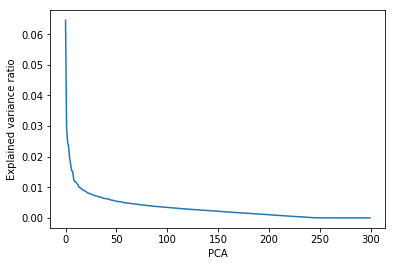

In [29]:
import matplotlib.pyplot as plt
pd.Series(pca.explained_variance_ratio_).plot()
plt.xlabel("PCA")
plt.ylabel("Explained variance ratio")

In [30]:
a = pd.Series(pca.explained_variance_ratio_).cumsum()
a[a>=0.99][:3]

217    0.990577
218    0.991203
219    0.991795
dtype: float64

In [31]:
pca = decomposition.PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

In [32]:
X_pca.shape

(1460, 218)

In [36]:
# dependent variable/target varible/label
label = "SalesPrice"

# independepent variables/features/predictors
X = df.drop(columns=[label])


# vector for target variable
y = np.log(df[label])

# one hot encoding to conver categorical features into numeric
# drop_first: remove first value of a categorical feature ... it is redundant
X = pd.get_dummies(X, drop_first=True)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("pca", decomposition.PCA(n_components=0.1)),
    ("est", linear_model.LinearRegression())
])

scores = model_selection.cross_val_score(pipe, X, y, cv = 5)

In [37]:
scores.mean()

0.7236336294790424

In [40]:
scores = {}
for pca_ratio in np.linspace(0.1, 0.99, 10):
    pipe = pipeline.Pipeline([
        ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
        ("scaler", preprocessing.StandardScaler()),
        ("pca", decomposition.PCA(n_components=pca_ratio)),
        ("est", linear_model.LinearRegression())
    ])
    scores[pca_ratio] = model_selection.cross_val_score(pipe, X, y, cv = 5)

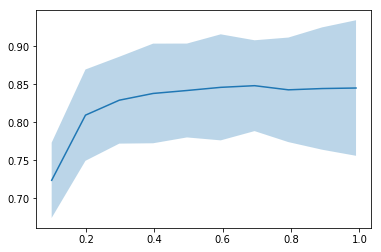

In [52]:
scores_mean = np.array([np.mean(scores[v]) for v in scores])
scores_std = np.array([np.std(scores[v]) for v in scores])
plt.plot(scores.keys(), scores_mean)
plt.fill_between(scores.keys(), scores_mean + 2*scores_std
                 , scores_mean - 2*scores_std, alpha = 0.3)

In [55]:
pca.components_.shape

(218, 300)

In [56]:
pca.components_[0]

array([-8.87814673e-03,  6.50695745e-02,  3.28738852e-02,  1.80427539e-01,
       -5.02612286e-02,  1.91770193e-01,  1.54461094e-01,  9.79017347e-02,
        7.75928531e-02, -1.32444776e-02,  5.90476525e-02,  1.35272051e-01,
        1.13274704e-01,  4.22176040e-02, -2.82859960e-02,  1.15788231e-01,
        5.00710662e-02, -5.93484714e-03,  1.33604968e-01,  6.68804142e-02,
        1.08972608e-02, -5.20580795e-02,  7.93984044e-02,  8.66507177e-02,
        1.82982250e-01,  1.65185624e-01,  1.55499973e-01,  7.29798102e-02,
        6.99243602e-02, -6.31393459e-02,  1.09798125e-02,  6.84669365e-03,
        1.21193356e-02, -1.03121361e-02,  9.77325406e-03, -5.88354123e-03,
       -2.99676626e-02,  4.15530689e-02, -2.61925042e-02,  6.75744669e-02,
       -8.69086228e-02, -1.10267231e-02,  1.10267231e-02, -5.94525852e-02,
        4.87286391e-02, -5.85973017e-03,  6.04322598e-02,  2.33936720e-02,
        1.54266733e-02, -6.97047670e-02, -4.15975543e-02,  1.97012007e-02,
        7.68018331e-04,  